# Regression Homework

In this assignment you will recreate the code that you saw during the lecture.  
First, you will need to write a function that performes linear regression with multiple variables.
Recall, also, what the purpose of your code should be:  
We have some function **y = f(x) + epsilon** that takes as inputs numbers **x** and gives as outputs numbers **y**. **f(x)** is the green line you saw in the graph during the lecture and **epsiolon** is a random number coming from the gaussian normal distribution with mean **0** and standard deviation **sigma**.  
We say **epsilon ~ N(0,sigma)**.  
Another way of saying the same thing is **y ~ N(f(x), sigma)**, that is **y** comes from the normal distribution with mean **f(x)** and standard deviation **sigma**.
The function **f** has some parameters **beta_star** and the **y** points generated are the **y_star** - the true instances.

For a fixed interval **[xmin ... xmax]**, we uniformly randomly generate some **num_points** points in the 1darray **x_vec**.  
Then, using our random function **y**, for **x_vec** we generate 1darray **y_star**
These are the blue dots around the green line which will be our training data.  

We then try to forget that the blue dots were created with the green line, and try to **regress** the parameters of the green line using linear regression - this will be our **beta_hat.** This **beta_hat** corresponds to one red line from the lecture. We can plot the red line and see how it is different from the green line.
If we generate new blue points **x_vec** and perform regression on them, we will see that we found a new **beta_hat** and this will correspond to a new red line.  
We perform this **num_trials** times and plot all the red lines on the same plot together with the green line. The spread of the red lines shows us the **variance** of our model. And if the model is too simple and underfits the data, this will show us the **bias** of our model.

We will do the above with a few steps.


In [6]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from random import choices

## Part 1


First we write our linear regression function using the closed form solution

In [26]:
#X is matrix and Y is an array. Remember that the first column of X is 1s
def linear_regression(X,Y):
    return np.linalg.inv(X.T@X)@X.T@Y

In [27]:
X = np.array([[1, 2], [3, 4]])
Y = np.array([1, 0])
print(X.shape, Y.shape)
linear_regression(X,Y)

(2, 2) (2,)


array([-2. ,  1.5])

### 2
In the simplest case, we want to write the above functionality for a 1d linear regression where both the green line and the red line will be straight lines.  
To do this we will write a few functions:

In [28]:
# generates num_points random numbers from a uniform distribution.
def generate_x_vec(xmin, xmax, num_points):
    return np.random.uniform(xmin, xmax, num_points)

Next, we write the function **generate_points** which will generate the **y_star** values for the points we have in **x_vec**. **y_star** will be generating using the green line, that is, **beta_star**.  
Hint: if you construct the right matrix **X** then **y_star1** will be **X.dot(beta_star)** ... well almost, remember that **y_star** should have some randomness - so **y_star = np.random.normal(y_star1, sigma)** - this will add some randomness. 

Now you have your blue dots and it is time to perform regression on them. Make sure you give the **correct X** to the linear regression function and you will receive your **beta_hat**. 

In [29]:
def generate_points(x_vec, sigma, beta_star):
    y_star1 = []
    for i in range(len(x_vec)):
        y = 0
        for j in range(len(beta_star)):
            y += beta_star[j]*x_vec[i]**j
        y_star1.append(y)
    x0 = np.array(len(x_vec)*[1])
    x = np.vstack((x0, x_vec)).T
    y_star = np.random.normal (y_star1, sigma)
    beta_hat = linear_regression(x, y_star.T)
    return y_star, beta_hat

Now, write some code to use your functions to generte and plote everything. The pseudocode will be like this:

1. choose values for **xmin**, **xmax**, and **num_points**  
2. generate x_vec using **generate_x_vec**
3. Find **beta_hat** and **y_star** using **generate_points**
4. Plot the green line. You need to divide **[xmin ... xmax]** into 100 small parts and put these into vector x_line, then find a matrix X from x_line and find y_line which is your y values for the green line. Hint: use beta_star
5. Plot the red line. Same as above but you will use beta_hat you got from the regression. 
6. Plot the blue points



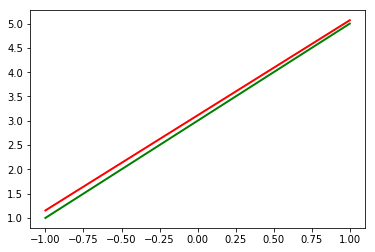

In [30]:
# add the code
xmin = -1
xmax = 1
num_points = 80
sigma = 0.5
beta_star = [3, 2]
x_vec = generate_x_vec(xmin, xmax, num_points)
y_star, beta_hat = generate_points(x_vec, sigma, beta_star)
x_line = np.linspace(xmin, xmax, num_points)
x0 = np.array(len(x_vec)*[1])
x = np.vstack((x0, x_line)).T
y_line = x@beta_star
y_line1 = x@beta_hat
plt.plot(x_line, y_line, linewidth=2, color="green")
plt.plot(x_line, y_line1, linewidth=2, color="red")
plt.show()

Now write a function **plot_lines** that generates the blue dots many times and plots all the red lines in one plot.

In [31]:
def plot_lines(beta_star, num_trials, xmin, xmax, num_points, sigma):
    x_line = np.linspace(xmin, xmax, num_points)
    for _ in range(num_trials):
        x_vec = generate_x_vec(xmin, xmax, num_points)
        y_star, beta_hat = generate_points(x_vec, sigma, beta_star)
        x = np.vstack((np.array(len(x_vec)*[1]), x_line)).T
        y_line = x@beta_hat
        plt.plot(x_line, y_line, linewidth=2, color="red")
    X_star = np.vstack((np.array(len(x_vec)*[1]), x_line)).T
    y_line1 = X_star@beta_star
    plt.plot(x_line, y_line1, linewidth=2, color="green")
    plt.plot(x_vec, y_star , 'o')
    plt.show()
    pass

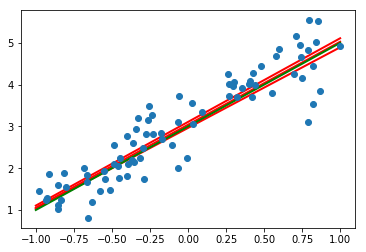

In [32]:
xmin = -1
xmax = 1
num_points = 80
sigma = 0.5
beta_star = [3, 2]
num_trials = 3
plot_lines(beta_star, num_trials, xmin, xmax, num_points, sigma)

And finally write some code to use plot_lines to plot the image for some values that you choose

## Part2

In part 2, we extend the functionality of our program to include polynomial regression, as learned in class. In this part you will need to specify the degree of the polynomial of the green line and also the degree of the polynomials in red lines.  

Do not modify the functions you wrote above for the 1D case. Instead write new functions below, though you can use some of the code you wrote above. The oncly thing you can leave the same is the **linear_regression** function.

In [14]:
# You still need to generate the x values of your points.
def generate_x_vec(xmin, xmax, num_points):
        return np.random.uniform(xmin, xmax, num_points)

Now, your x vector is still a 1D vector but for polynomial you need to create a matrix **XX** that contains many degrees of the inputs x. For this we will write a function **transform_x** that will take a vector **x** and return a matrix **X** for the d-degree polynomial regression.

In [15]:
# x is a 1D array of the inputs
# return X where X is a num_points * (d+1) array
def transform_x(x,d):
    x_d = []
    for i in range(d+1):
        x_d.append(np.array(x**i))
    X = np.vstack(x_d).T
    return X

Now you need to write the generate_points_polynomial function. 

Here are the instructions for this from above:  

Write function **generate_points_polynomial** which will generate the **y_star** values for the points we have in **x_vec**. **y_star** will be generating using the green line, that is, **beta_star**.  
Hint: if you construct the right matrix **X** then **y_star1** will be **X.dot(beta_star)** ... well almost, remember that **y_star** should have some randomness - so **y_star = np.random.normal(y_star1, sigma)** - this will add some randomness. 

Now you have your blue dots and it is time to perform regression on them. Make sure you give the **correct X** to the linear regression function and you will receive your **beta_hat**. 

The difference from the simple case is that you have two more function variables - **d_star** and **d_train**. **d_star** is the degree of the polynomial that represents the real function - the green line. **d_train** on the other hand, the degree of the polynomials we are using for our regression. Think about the relationship of **d_star**, **beta_star, d_train,** and **beta_hat**.



In [16]:
def generate_points_polynomial(x_vec, sigma, d_star, beta_star, d_train):
    y_star1 = []
    for i in range(len(x_vec)):
        y = 0
        for j in range(d_star + 1):
            y += beta_star[j]*x_vec[i]**j
        y_star1.append(y)
    y_star = np.random.normal (y_star1, sigma).T
    X = transform_x(x_vec, d_train)
    beta_hat = linear_regression(X, y_star)
    return y_star, beta_hat

now, write **plot_lines_polynomial** that will do the work to generate the points and plot the lines.

Hint: When plotting the graphs of red and green lines, think carefully about what X you are using to compute the Y.

In [17]:
def plot_lines_polynomial(d_star, beta_star, d_train, num_trials, xmin, xmax, num_points, sigma):
    x_line = np.linspace(xmin, xmax, num_points)
    for _ in range(num_trials):
        x_vec = generate_x_vec(xmin, xmax, num_points)
        y_star, beta_hat = generate_points_polynomial(x_vec, sigma, d_star, beta_star, d_train)   
        X = transform_x(x_line, d_train)
        y_line = X@beta_hat
        plt.plot(x_line, y_line, linewidth=2, color="red")
    X1 = transform_x(x_line, d_star)
    y_line1 = X1@beta_star
    plt.plot(x_line, y_line1, linewidth=2, color="Green")
    plt.plot(x_vec, y_star , 'o')
    plt.show()
    pass

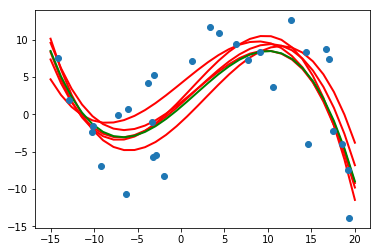

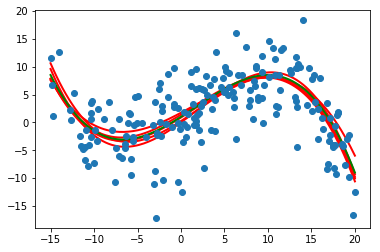

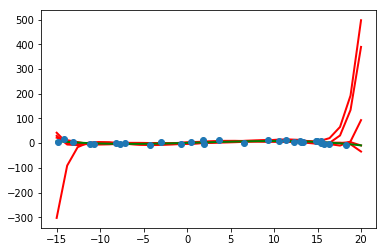

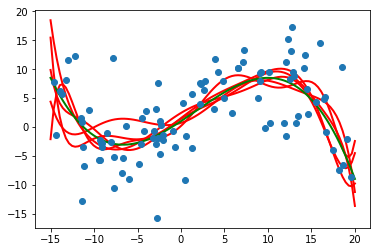

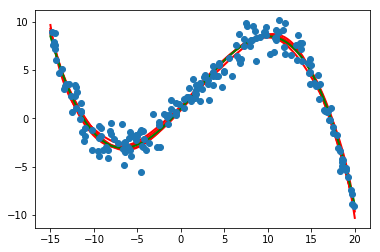

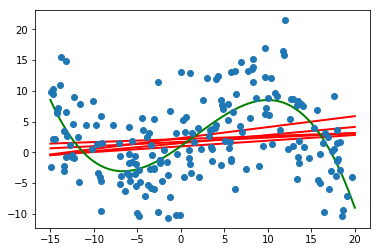

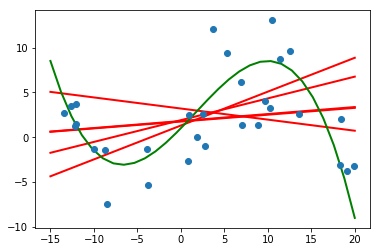

In [40]:
num_trials = 5
beta_star = [1, 1, 0.025, - 0.005]
d_star = 3
d_train = 3
d_train2 = 9
d_train3 = 1
plot_lines_polynomial(d_star, beta_star, d_train, 5, -15, 20, 30, 5)
plot_lines_polynomial(d_star, beta_star, d_train, 5, -15, 20,200, 5)
plot_lines_polynomial(d_star, beta_star, d_train2, 5, -15, 20,30, 5)
plot_lines_polynomial(d_star, beta_star, d_train2, 5, -15, 20,100, 5)
plot_lines_polynomial(d_star, beta_star, d_train2, 5, -15, 20,200, 1)
plot_lines_polynomial(d_star, beta_star, d_train3, 5, -15, 20,200, 5)
plot_lines_polynomial(d_star, beta_star, d_train3, 5, -15, 20,30, 5)

## Finally, write some code to plot some results for various interesting cases for beta_star, d_star, d_train, num_points, and sigma.  

plot a case for overfitting (high variance) and a case for underfitting (high bias).

experiment with number of points as well as sigma and see how things affect each other - just play around and have fun.

## Part 3

In this part, you need to further develop your model to include any kinds of functions that we can specify.
To do so, you mainly need to modify the transform_x function to include any kinds of transformations.


In [45]:
# here x is the vector of inputs you have generated
# trans vector is a python list of functions. Each function determines how you compute the ith column of matrix X
# for example [lambda x: 1, lambda x: x, lambda x: x**2] is the equivalent for second degree regression
def transform_universal(x, trans_vector):
    x_d = []
    for x_i in trans_vector:
        a = []
        for j in x:
            a.append(x_i(j))
        x_d.append(np.array(a))
    X = np.vstack(x_d).T
    return X
# pass ???

In [20]:
# same as the polynomial, but now instead of just d_star and d_train we have trans_vec_star and trans_vec_train which
# are vectors of functions
def generate_points_universal(x_vec, sigma, trans_vec_star, beta_star, trans_vec_train):
    y_star1 = []
    X_star = transform_universal(x_vec, trans_vec_star)
    for x_i in X_star:
        y_star1.append(beta_star@x_i)
    y_star = np.random.normal(y_star1, sigma).T
    X_train = transform_universal(x_vec, trans_vec_train)
    beta_hat = linear_regression(X_train, y_star)
    return y_star, beta_hat

In [21]:
def plot_lines_universal(trans_vec_star, beta_star, trans_vec_train, num_trials, xmin, xmax, num_points, sigma):
    x_line = np.linspace(xmin, xmax, num_points)
    for _ in range(num_trials):
        x_vec = generate_x_vec(xmin, xmax, num_points)
        y_star, beta_hat = generate_points_universal(x_vec, sigma, trans_vec_star, beta_star, trans_vec_train)
        X_train = transform_universal(x_line, trans_vec_train)
        y_line = X_train@beta_hat
        plt.plot(x_line, y_line, linewidth=2, color="red")
    X_star = transform_universal(x_line, trans_vec_star)
    y_line1 = X_star@beta_star
    plt.plot(x_line, y_line1, linewidth=2, color="Green")
    plt.plot(x_vec, y_star , 'o')
    plt.show()
    pass

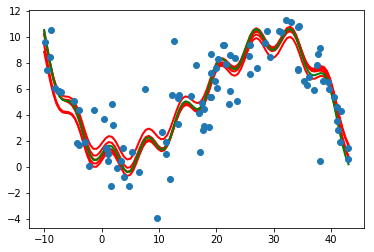

In [44]:
trans_vector_train = [lambda x: 1, lambda x: x, lambda x: x**2,lambda x: x**3, lambda x: np.sin(x)]
trans_vector_star = [lambda x: 1, lambda x: x, lambda x: x**2,lambda x: x**3, lambda x: np.sin(x)]
beta_star = np.array([1, -0.3 , 0.05, -0.001 , 1])
num_trials = 5
xmin = -10
xmax = 43
num_points = 50
sigma = 2
plot_lines_universal(trans_vector_star, beta_star, trans_vector_train, 5,  -10, 43,100, 2)

and write some test cases for the universal case as well  
Experiment with **beta_star** coefficients and trans_vec_star to get functions that have some fluctuations.  
Maybe add sin(x) functions. Other interesting functions.  
Try to do so that the values of the functions are not too big so the fluctuations are seen with eyes. To achieve this
use small coefficients for the large degrees of the polynomial.  
You can also use sqrt(x) or x**(1.3) or something like this to get some interesting functions.

In [ ]:
xmin = -2
xmax = 2
num_points = 100
num_trials = 3
sigma = 5
beta_star = [1, 3, 0.3, 1.5, 0.5]
trans_vec_train = [lambda x: 1, lambda x: x, lambda x: x**2, lambda x: x**3, lambda x: np.cos(x)]
trans_vec_star = [lambda x: 1, lambda x: x, lambda x: x**2, lambda x: x**3, lambda x: np.sin(x)]
plot_lines_universal(trans_vec_star, beta_star, trans_vec_train, num_trials, xmin, xmax, num_points, sigma)

In [ ]:
xmin = -2
xmax = 2
num_points = 80
sigma = 2.5
beta_star = [3, 2, 3.1, 2.5]
d_star = 3
d_train = 2
num_trials = 3
print(plot_lines_polynomial(d_star, beta_star, d_train, num_trials, xmin, xmax, num_points, sigma))